In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Метод Эйлера
def euler(grid, u0, tau, lambda_):
    u = [u0]
    for _ in range(len(grid) - 1):
        u.append((1 - tau * lambda_) * u[-1])
    return u

In [101]:
# Метод Эйлера c весами (неявный)
def euler_weighted(grid, u0, tau, lambda_):
    u = [u0]
    for _ in range(len(grid) - 1):
        u.append(u[-1] / (1 + tau * lambda_))
    return u

In [102]:
# Метод Рунге-Кутты (двухэтапный: предиктор-корректор)
def rounge_kutt(grid, u0, tau, lambda_):
  u = [u0]
  for _ in range(len(grid) - 1):
    u.append(u[-1] * (1 - lambda_ * tau * (1 - lambda_ * tau / 2)))
  return u

In [103]:
# Параметры задачи
# lambda_ = 1.  # Уравнение: u' = -λ*u (λ положительный)
u0 = 1.  # Начальное условие
t0 = 0  # Начальное время
t_end = 25  # Конечное время

In [104]:
def get_plot(lambda_, y_log=False):
  taus = [1.5 / lambda_, 2.0 / lambda_, 2.5 / lambda_]  # τ < 2/λ, τ = 2/λ, τ > 2/λ. Веса для метода Эйлера с весами
  grids = [np.arange(t0, t_end, tau) for tau in taus]
  labels = ['τ < 2/λ', 'τ = 2/λ', 'τ > 2/λ']

  fig, axs = plt.subplots(1, len(taus), figsize=(15, 5))

  for i, grid in enumerate(grids):
      axs[i].plot(grid, euler(grid, u0, taus[i], lambda_), label='Явный метод Эйлера')
      axs[i].plot(grid, euler_weighted(grid, u0, taus[i], lambda_), label='Неявный метод Эйлера')
      axs[i].plot(grid, rounge_kutt(grid, u0, taus[i], lambda_), label='Метод Рунге-Кутта (передиктор-корректор)')
      if i == 1:
        axs[i].set_title(f"u' = - {lambda_} * u\n{labels[i]}")
      else:
        axs[i].set_title(labels[i])
      u_exact = u0 * np.exp(-lambda_ * grid)
      axs[i].plot(grid, u_exact, label='Точное решение')
      axs[i].grid()
      axs[i].set_xlabel('t')
      axs[i].set_ylabel('u(t)')
      axs[i].legend()
      if y_log:  # Логарифмическая шкала по y
        axs[i].set_yscale('log')

  plt.tight_layout()
  plt.show()

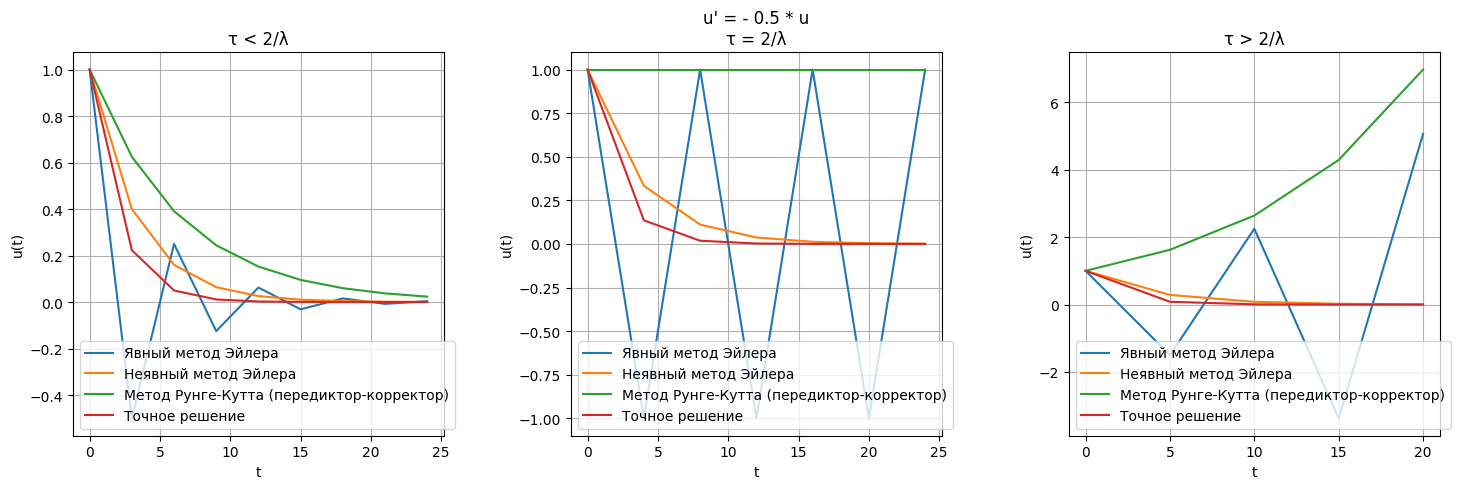

In [105]:
get_plot(0.5)

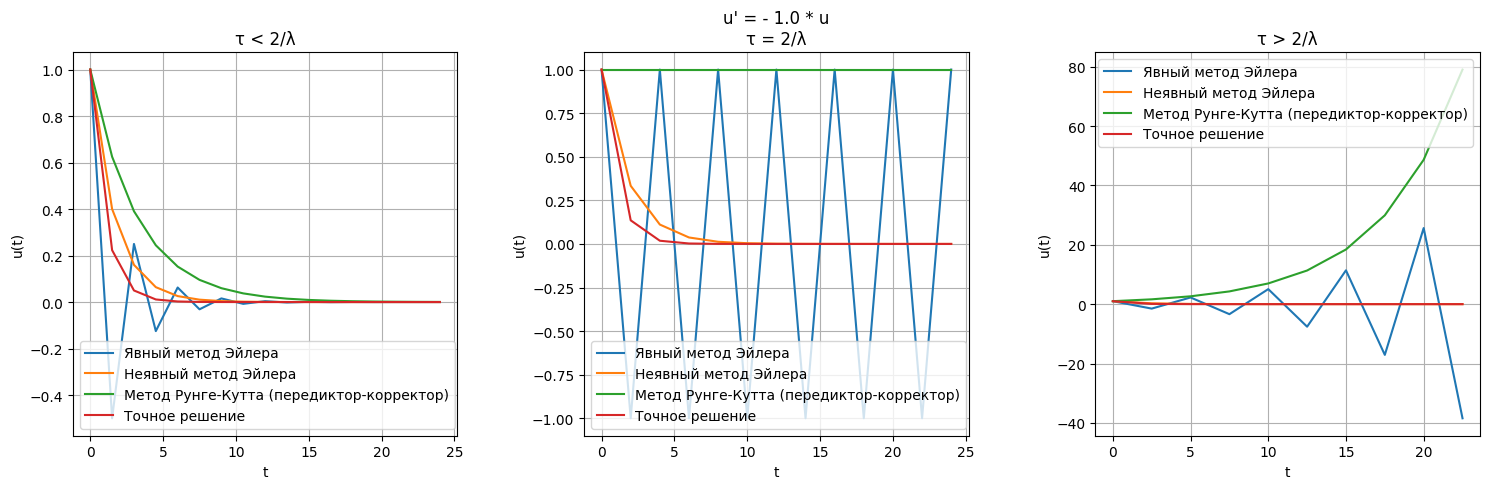

In [106]:
get_plot(1.)

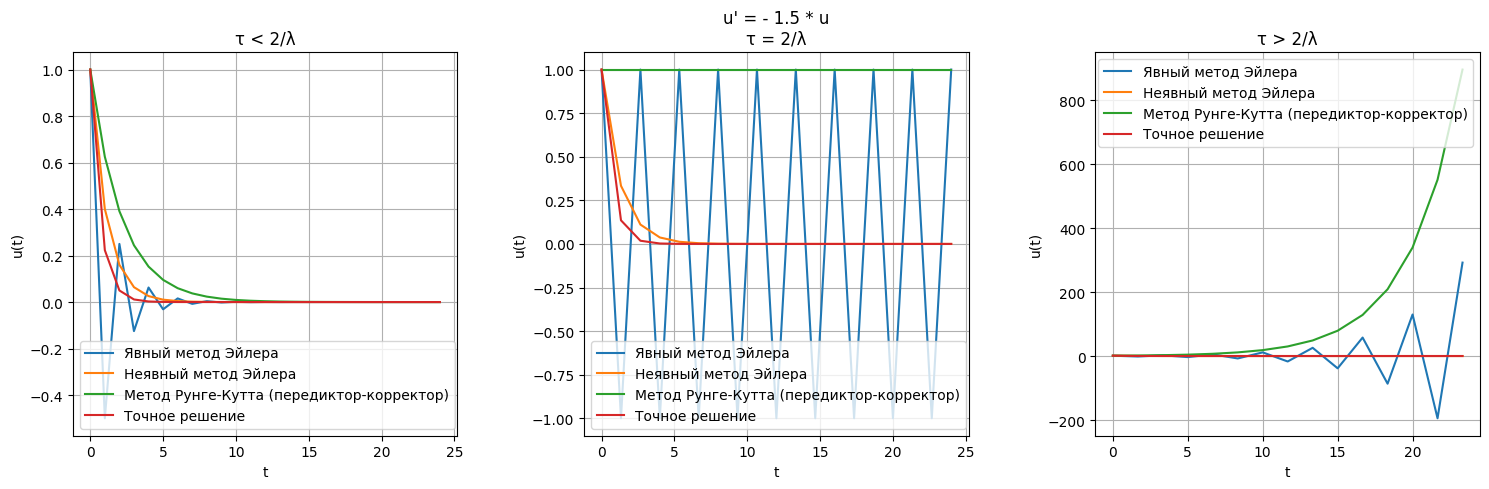

In [107]:
get_plot(1.5)

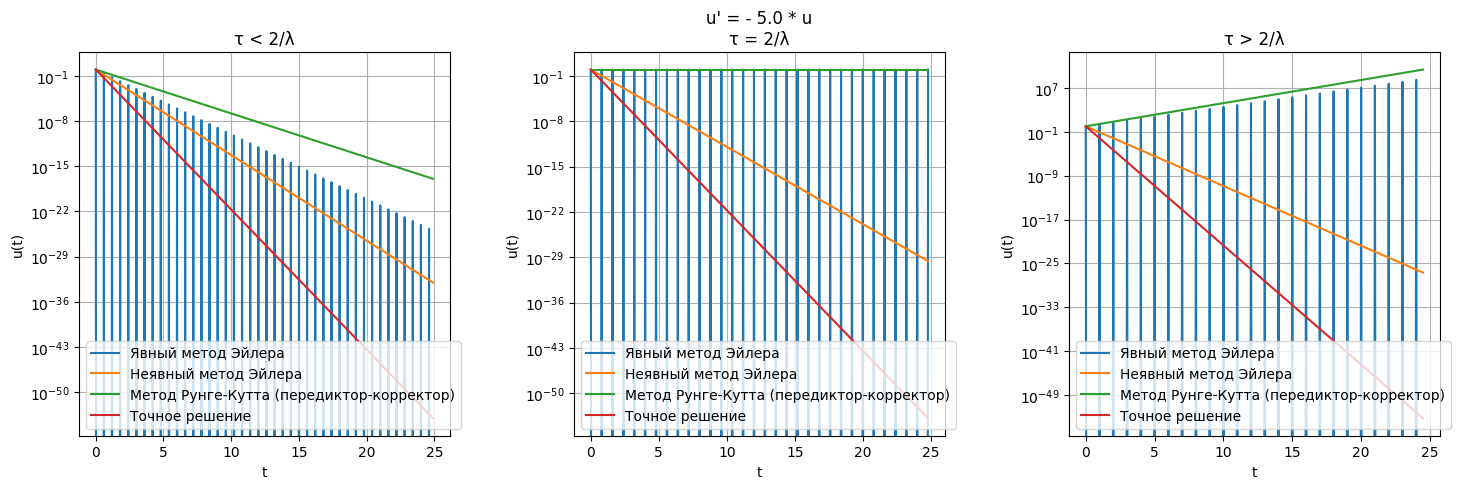

In [108]:
get_plot(5., y_log=True)